<a href="https://colab.research.google.com/github/VeerVikramSingh/Coursera-Deep-Learning/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import pca
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
! pip install category_encoders

     |████████████████████████████████| 102kB 2.3MB/s 


In [0]:
import category_encoders as ce

In [0]:
prices=pd.read_csv("https://raw.githubusercontent.com/itsmuriuki/Predicting-House-prices/master/train.csv")

In [5]:
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
prices.shape

(1460, 81)

In [7]:
print(prices.columns)
print(prices.index)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
prices["class"]=pd.cut(prices["SalePrice"],bins=2,labels=[1,2])


In [39]:
prices["class"].value_counts()

1    1099
2     331
Name: class, dtype: int64

In [11]:
prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

In [13]:
prices.shape

(1460, 82)

In [14]:
prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
pd.__version__

'1.0.3'

In [15]:
!pip list | grep pandas

pandas                   0.25.3         
pandas-datareader        0.8.1          
pandas-gbq               0.11.0         
pandas-profiling         2.5.0          
sklearn-pandas           1.8.0          


In [0]:
import pandas_profiling


In [26]:
! pip install pandas_profiling==2.5.0

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 9.0MB/s 
     |████████████████████████████████| 614kB 31.7MB/s 
     |████████████████████████████████| 1.5MB 34.3MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 256kB 42.6MB/s 
     |████████████████████████████████| 307kB 42.5MB/s 
     |████████████████████████████████| 215kB 36.3MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 747kB 40.0MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=96e8479b82d172497c1076139d7f954c01ba2247e3e356c4a4ed6b2bbfbfe80e
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp3

In [0]:
import pandas_profiling

In [17]:
report=pandas_profiling.ProfileReport(prices)

In [41]:
report.to_file("NY_Housing.html")

NameError: ignored

In [42]:
prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [40]:
prices[prices["HouseStyle"]=="2.5Unf"]["class"].value_counts()

1    10
2     1
Name: class, dtype: int64

In [0]:
def change_format(df,mapping_dict):
  return df.astype(mapping_dict)

In [0]:
def drop_columns(df,list_columns):
  return df.drop(list_columns,axis=1)

In [0]:
mapping_dict = {
    "MSSubClass" : "category",
    "YearBuilt" : "category",
    "YearRemodAdd" : "category",
}

In [0]:
prices_format_change=change_format(prices,mapping_dict)

In [72]:
prices_format_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1415 non-null   float64 
 1   MSSubClass     1270 non-null   category
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1162 non-null   float64 
 4   LotArea        1415 non-null   float64 
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1231 non-null   fl

In [0]:
# If you want to drop column by Zero Values Threshold & NA value Threshold - use this def 

def dropColumn_Threshold(df, Zerothreshold, NAThreshold):
  t_zero,t_null,drop_colums = Zerothreshold,NAThreshold,[]    # (ZeroThresholdm, NAThreshold)
  for c in df.columns:
    if t_zero <= ((df[c] == 0).sum() / df.shape[0])*100:
      drop_colums.append(c)
    elif t_null <= ((df[c].isnull()).sum() / df.shape[0])*100:
      drop_colums.append(c)
  print ("Columns Dropped are: ", drop_colums)
  return df.drop(drop_colums, axis=1)

In [0]:
def drop_columns(df,list_columns):
  return df.drop(list_columns,axis=1)

In [0]:
list_columns = ["FireplaceQu","PoolQC"]


In [76]:
new_drop_columns=drop_columns(prices,list_columns)
new_drop_columns.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,class
0,1.0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,NaN,1710.0,NaN,NaN,NaN,NaN,NaN,NaN,Gd,8.0,Typ,NaN,Attchd,2003.0,RFn,NaN,548.0,TA,TA,Y,0.0,61.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,2.0,NaN,WD,Normal,208500.0,1
1,2.0,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,NaN,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,NaN,1262.0,NaN,NaN,NaN,NaN,NaN,NaN,TA,6.0,Typ,NaN,Attchd,1976.0,RFn,NaN,460.0,TA,TA,Y,298.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0,1
2,3.0,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,Gd,6.0,Typ,NaN,Attchd,2001.0,RFn,NaN,608.0,TA,TA,Y,0.0,42.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,9.0,NaN,WD,Normal,223500.0,2
3,4.0,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,NaN,1717.0,NaN,NaN,NaN,NaN,NaN,NaN,Gd,7.0,Typ,NaN,Detchd,1998.0,Unf,NaN,642.0,TA,TA,Y,0.0,35.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0,1
4,5.0,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,NaN,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,NaN,2198.0,NaN,NaN,NaN,NaN,NaN,NaN,Gd,NaN,Typ,NaN,Attchd,2000.0,RFn,NaN,836.0,TA,TA,Y,192.0,84.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,WD,Normal,250000.0,2


In [77]:
prices_drop_column_threshold = dropColumn_Threshold(prices, 90, 50)

Columns Dropped are:  ['Alley', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'YrSold']


In [78]:
prices_drop_column_threshold.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'class'],
      dtype='object')

In [38]:
# this is Label Encoding ---- We need to check for Ordinal (LabelEncoded) & Nominal (DummyEncoded) 
replaceHouseStyle = {'1Story':0, '2Story':1, '1.5Fin':2, '2.5Fin':3, '1.5Unf':4, 'SFoyer':4, 'SLvl':4, '2.5Unf':4}
prices_objects.HouseStyle = prices_objects.HouseStyle.map(replaceHouseStyle)
prices_objects.HouseStyle.value_counts()
replaceBldgType = {'1Fam':0, '2fmCon':1, 'Duplex':1, 'TwnhsE':1, 'Twnhs':1}
prices_objects.BldgType = prices_objects.BldgType.map(replaceBldgType)
replaceCondition1 = {'Norm':0, 'Feedr':1, 'Artery':2, 'RRAn':3, 'RRAe':4, 'RRNn':4, 'PosN':4, 'PosA':4, 'RRNe':4}
prices_objects.Condition1 = prices_objects.Condition1.map(replaceCondition1)
replaceLotConfig = {'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':3}
prices_objects.LotConfig = prices_objects.LotConfig.map(replaceLotConfig)

NameError: ignored

In [79]:
# Define Zero Drop hreshold & Null Threshold 
t_zero,t_null,drop_colums = 90,90,[]    # (ZeroThresholdm, NAThreshold)
for c in prices.columns:
  if t_zero <= ((prices[c] == 0).sum() / prices.shape[0])*100:
    drop_colums.append(c)
  elif t_null <= ((prices[c].isnull()).sum() / prices.shape[0])*100:
    drop_colums.append(c)

drop_colums 

['Alley',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal']

In [0]:
# You can replace all outlier with NAN - define outlier with Percentile Value 
t_quantile = 0.99
float_columns = prices.loc[:, prices.dtypes == np.float64 ].columns.tolist()
int_columns = prices.loc[:, prices.dtypes == np.int64 ].columns.tolist() 
for col in float_columns + int_columns:
  outlier_df = prices[prices[col] >= prices[col].quantile(t_quantile)] 
  prices[col].replace(outlier_df[col].tolist(),np.nan,inplace =True)

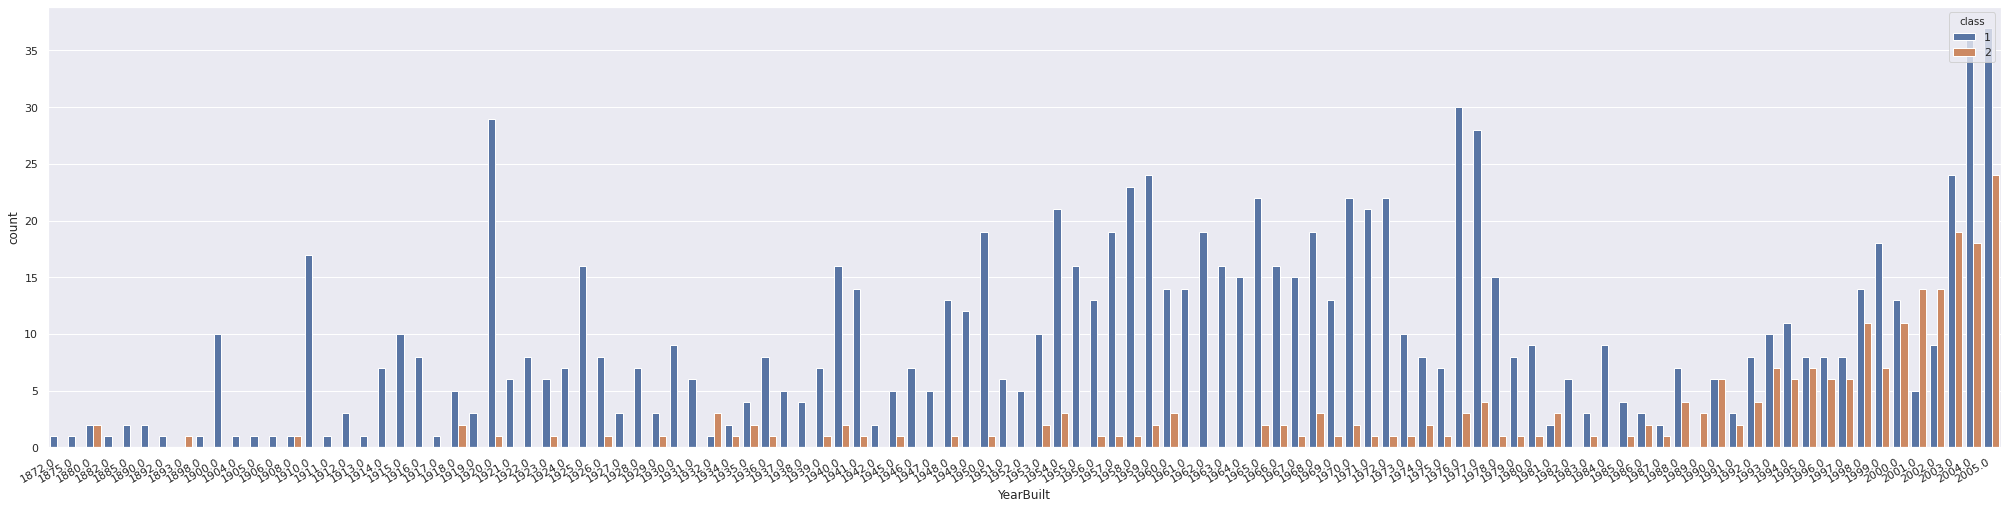

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(35,9)})
fig, ax = plt.subplots()
sns.countplot(prices['YearBuilt'],hue = prices['class'] )
fig.autofmt_xdate()
plt.show()

In [59]:
import plotly.express as px
#prices.YearBuilt
fig = px.histogram(prices, x="YearRemodAdd", color="class",y="SalePrice",histfunc='max')
fig.show()

KeyError: ignored

MSZoning: Identifies the general zoning classification of the sale.

   A    Agriculture
   C    Commercial
   FV    Floating Village Residential
   I    Industrial
   RH    Residential High Density
   RL    Residential Low Density
   RP    Residential Low Density Park 
   RM    Residential Medium Density
Grvl Gravel
Pave Paved

Reg    Regular    
   IR1    Slightly irregular
   IR2    Moderately Irregular
   IR3    Irregular
 
   LandContour: Flatness of the property
 
   Lvl    Near Flat/Level    
   Bnk    Banked - Quick and significant rise from street grade to building
   HLS    Hillside - Significant slope from side to side
   Low    Depression
Inside Inside lot Corner Corner lot CulDSac Cul-de-sac FR2 Frontage on 2 sides of property FR3 Frontage on 3 sides of property

   Gtl    Gentle slope
   Mod    Moderate Slope    
   Sev    Severe Slope
LandSlope: Slope of property

   Gtl    Gentle slope
   Mod    Moderate Slope    
   Sev    Severe Slope
Neighborhood: Physical locations within Ames city limits

   Blmngtn    Bloomington Heights
   Blueste    Bluestem
   BrDale    Briardale
   BrkSide    Brookside
   ClearCr    Clear Creek
   CollgCr    College Creek
   Crawfor    Crawford
   Edwards    Edwards
   Gilbert    Gilbert
   IDOTRR    Iowa DOT and Rail Road
   MeadowV    Meadow Village
   Mitchel    Mitchell
   Names    North Ames
   NoRidge    Northridge
   NPkVill    Northpark Villa
   NridgHt    Northridge Heights
   NWAmes    Northwest Ames
   OldTown    Old Town
   SWISU    South & West of Iowa State University
   Sawyer    Sawyer
   SawyerW    Sawyer West
   Somerst    Somerset
   StoneBr    Stone Brook
   Timber    Timberland
   Veenker    Veenker
Condition1: Proximity to various conditions

   Artery    Adjacent to arterial street
   Feedr    Adjacent to feeder street    
   Norm    Normal    
   RRNn    Within 200' of North-South Railroad
   RRAn    Adjacent to North-South Railroad
   PosN    Near positive off-site feature--park, greenbelt, etc.
   PosA    Adjacent to postive off-site feature
   RRNe    Within 200' of East-West Railroad
   RRAe    Adjacent to East-West Railroad
Condition2: Proximity to various conditions (if more than one is present)

   Artery    Adjacent to arterial street
   Feedr    Adjacent to feeder street    
   Norm    Normal    
   RRNn    Within 200' of North-South Railroad
   RRAn    Adjacent to North-South Railroad
   PosN    Near positive off-site feature--park, greenbelt, etc.
   PosA    Adjacent to postive off-site feature
   RRNe    Within 200' of East-West Railroad
   RRAe    Adjacent to East-West Railroad
1Fam Single-family Detached
2FmCon Two-family Conversion; originally built as one-family dwelling Duplx Duplex TwnhsE Townhouse End Unit TwnhsI Townhouse Inside Unit

HouseStyle: Style of dwelling

   1Story    One story
   1.5Fin    One and one-half story: 2nd level finished
   1.5Unf    One and one-half story: 2nd level unfinished
   2Story    Two story
   2.5Fin    Two and one-half story: 2nd level finished
   2.5Unf    Two and one-half story: 2nd level unfinished
   SFoyer    Split Foyer
   SLvl    Split Level

In [0]:
prices[prices["HouseStyle"]=="2Story"]["class"].value_counts()

In [0]:
replaceMSZone = {'FV': 0, 'RH': 0, 'C (all)': 0, 'RL': 1, 'RM': 2}
mappedMSZoning = prices.MSZoning.map(replaceMSZone)

In [84]:
import plotly.express as px
df_plot = pd.DataFrame({'features': prices.columns, 'nullValues':prices.isnull().sum(), 'total':prices.shape[0]})
df_plot['Null%'] = round((df_plot.nullValues / df_plot.total) * 100,2)
px.bar(df_plot, x='features', y='Null%')
#df_plot.head()

In [85]:
prices.select_dtypes(include=["object"]).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [86]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1400 non-null   float64 
 1   MSSubClass     1218 non-null   float64 
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1148 non-null   float64 
 4   LotArea        1400 non-null   float64 
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    912 non-null    fl

In [87]:
# prices = all features except those with object type value
# prices_objects = all features with object type value
prices_objects = prices.select_dtypes(include=['object']).copy()
prices = prices.select_dtypes(exclude=['object']).copy()
prices_objects.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [90]:
prices.isnull().sum()

Id                 60
MSSubClass        242
LotFrontage       312
LotArea            60
OverallQual       548
OverallCond       551
YearBuilt         158
YearRemodAdd      242
MasVnrArea         68
BsmtFinSF1         60
BsmtFinSF2         60
BsmtUnfSF          60
TotalBsmtSF        60
1stFlrSF           60
2ndFlrSF           60
LowQualFinSF     1460
GrLivArea          60
BsmtFullBath     1460
BsmtHalfBath     1460
FullBath         1460
HalfBath         1460
BedroomAbvGr     1404
KitchenAbvGr     1460
TotRmsAbvGrd      339
Fireplaces       1460
GarageYrBlt       242
GarageCars       1460
GarageArea         61
WoodDeckSF         61
OpenPorchSF        62
EnclosedPorch      64
3SsnPorch        1460
ScreenPorch        63
PoolArea         1460
MiscVal          1460
MoSold            290
YrSold           1146
SalePrice          60
class              30
dtype: int64

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce #encoding
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA #dim red
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 



%matplotlib inline

In [0]:
prices=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/house.csv")

In [94]:
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [95]:
prices.shape

(1460, 81)

In [96]:
prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [97]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [0]:
prices_objects=prices.select_dtypes(include="object").copy()

In [0]:
prices=prices.select_dtypes(exclude="object").copy()

In [101]:
prices_objects.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [104]:
prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [105]:
prices.drop(["Id"],axis=1,inplace=True)
prices.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [106]:
prices_objects.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [0]:
prices_objects.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [117]:
prices_objects.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [118]:
prices_objects["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [124]:
prices_objects["BsmtQual"].value_counts().index

Index(['TA', 'Gd', 'Ex', 'Fa'], dtype='object')

In [125]:
prices_objects["BsmtQual"].value_counts().values

array([649, 618, 121,  35])

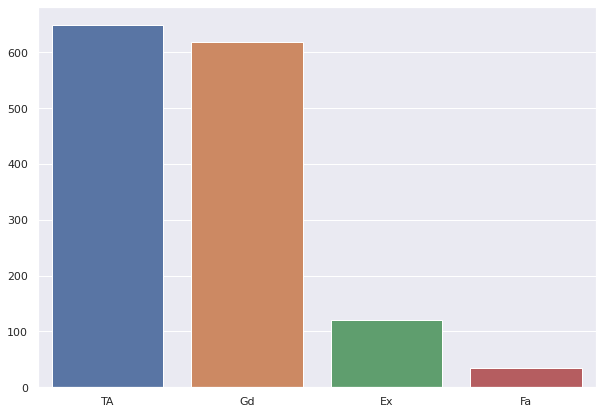

In [127]:
plt.figure(figsize=(10,7))
sns.barplot(prices_objects["BsmtQual"].value_counts().index,prices_objects["BsmtQual"].value_counts().values)

In [0]:
prices_objects["BsmtQual"]=prices_objects["BsmtQual"].fillna(prices_objects["BsmtQual"].value_counts().index[0])

In [130]:
prices_objects.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [131]:
prices_objects["BsmtQual"].value_counts().index[0]

'TA'

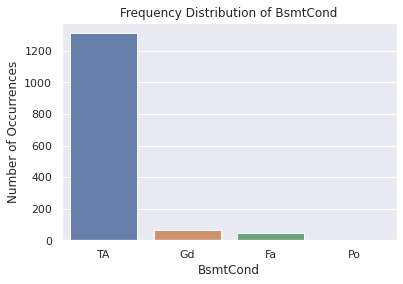

In [132]:
BsmtCond_count = prices_objects['BsmtCond'].value_counts()
sb.set(style="darkgrid")
sb.barplot(BsmtCond_count.index, BsmtCond_count.values, alpha=0.9)
plt.title('Frequency Distribution of BsmtCond')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BsmtCond', fontsize=12)
plt.show()

In [0]:
prices_objects['BsmtCond'] = prices_objects['BsmtCond'].fillna(prices_objects['BsmtCond'].value_counts().index[0])

In [0]:
prices_objects['BsmtExposure'] = prices_objects['BsmtExposure'].fillna(
                                        prices_objects['BsmtExposure'].value_counts().index[0])
prices_objects['BsmtFinType1'] = prices_objects['BsmtFinType1'].fillna(
                                        prices_objects['BsmtFinType1'].value_counts().index[0])
prices_objects['BsmtFinType2'] = prices_objects['BsmtFinType2'].fillna(
                                        prices_objects['BsmtFinType2'].value_counts().index[0])
prices_objects['Electrical'] = prices_objects['Electrical'].fillna(
                                        prices_objects['Electrical'].value_counts().index[0])
prices_objects['FireplaceQu'] = prices_objects['FireplaceQu'].fillna(
                                        prices_objects['FireplaceQu'].value_counts().index[0])
prices_objects['GarageType'] = prices_objects['GarageType'].fillna(
                                        prices_objects['GarageType'].value_counts().index[0])
prices_objects['GarageFinish'] = prices_objects['GarageFinish'].fillna(
                                        prices_objects['GarageFinish'].value_counts().index[0])
prices_objects['GarageQual'] = prices_objects['GarageQual'].fillna(
                                        prices_objects['GarageQual'].value_counts().index[0])
prices_objects['GarageCond'] = prices_objects['GarageCond'].fillna(
                                        prices_objects['GarageCond'].value_counts().index[0])
prices_objects['MasVnrType'] = prices_objects['MasVnrType'].fillna(
                                        prices_objects['MasVnrType'].value_counts().index[0])

In [135]:
prices_objects.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [137]:
prices.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [0]:
prices["LotFrontage"]=prices["LotFrontage"].fillna(prices["LotFrontage"].mean())

In [0]:
prices['MasVnrArea'] = prices['MasVnrArea'].fillna(prices['MasVnrArea'].mean())
prices['GarageYrBlt'] = prices['GarageYrBlt'].fillna(prices['GarageYrBlt'].mean())

In [140]:
prices.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [142]:
prices.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [143]:
# To show the count of every category in MSZoning column
print(prices_objects['MSZoning'].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


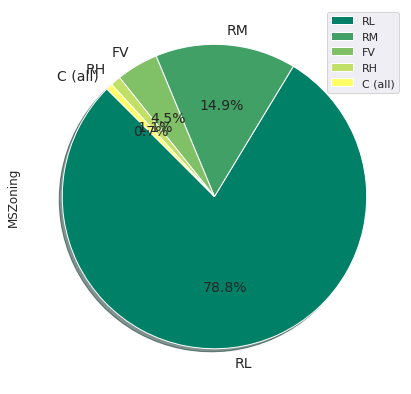

In [146]:
prices_objects["MSZoning"].value_counts().plot(kind="pie", fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='summer')

In [147]:
print(prices_objects['Exterior2nd'].value_counts())

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64


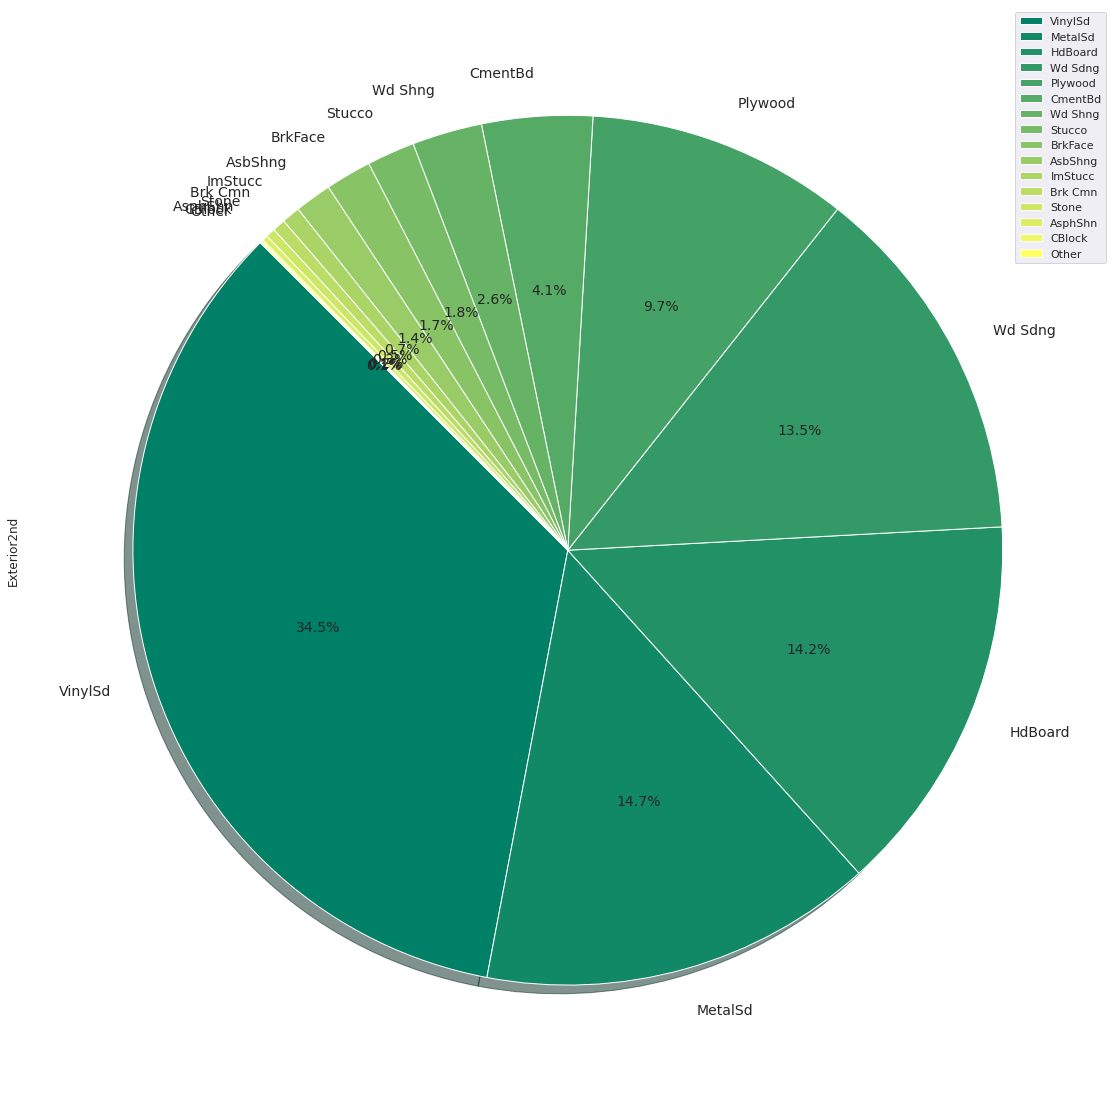

In [151]:
prices_objects["Exterior2nd"].value_counts().plot(kind="pie", fontsize=14, autopct='%1.1f%%', 
                                               figsize=(25,20), shadow=True, startangle=135, legend=True, cmap='summer')

In [0]:
encoder=ce.BackwardDifferenceEncoder(cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle',
            'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
            'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
            'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
            'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'])

In [153]:
prices_objects_BackDiffEnc = encoder.fit_transform(prices_objects)
prices_objects_BackDiffEnc.head()

,intercept,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,Street_0,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,...,Functional_0,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageFinish_0,GarageFinish_1,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,PavedDrive_0,PavedDrive_1,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.96,-0.92,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,-0.8,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,0.2,-0.6,-0.4,-0.2,-0.666667,-0.333333,0.04,-0.92,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.2,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.96,-0.92,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.2,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,0.2,0.4,-0.4,-0.2,-0.666667,-0.333333,0.04,0.08,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,-0.8,-0.6,-0.4,-0.2,0.166667,-0.666667,-0.5,-0.333333,-0.166667,0.333333,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,0.166667,-0.666667,-0.5,-0.333333,-0.166667
4,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,0.2,-0.6,-0.4,-0.2,-0.666667,-0.333333,0.04,0.08,0.12,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.2,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


In [0]:
prices_corpus=pd.concat([prices_objects_BackDiffEnc,prices],axis=1)

In [155]:
prices_corpus.head()

,intercept,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,Street_0,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,...,SaleCondition_2,SaleCondition_3,SaleCondition_4,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.96,-0.92,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.5,-0.333333,-0.166667,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,0.2,-0.6,-0.4,-0.2,-0.666667,-0.333333,0.04,-0.92,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.5,-0.333333,-0.166667,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.96,-0.92,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.5,-0.333333,-0.166667,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,0.2,0.4,-0.4,-0.2,-0.666667,-0.333333,0.04,0.08,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.5,-0.333333,-0.166667,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,0.2,-0.6,-0.4,-0.2,-0.666667,-0.333333,0.04,0.08,0.12,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.5,-0.333333,-0.166667,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
prices_corpus_scaled=MinMaxScaler().fit_transform(prices_corpus)


In [163]:
prices_corpus_scaled_df=pd.DataFrame(prices_corpus_scaled,columns=prices_corpus.columns)
prices_corpus_scaled_df.head()

,intercept,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,Street_0,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,...,SaleCondition_2,SaleCondition_3,SaleCondition_4,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709


In [0]:
y=prices_corpus_scaled_df["SalePrice"]

In [0]:
x=prices_corpus_scaled_df.loc[:,prices_corpus_scaled_df.columns!="SalePrice"]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [175]:
PCA=PCA()
PCA.fit(x)

TypeError: ignored

Text(0, 0.5, 'Variance Ratio')

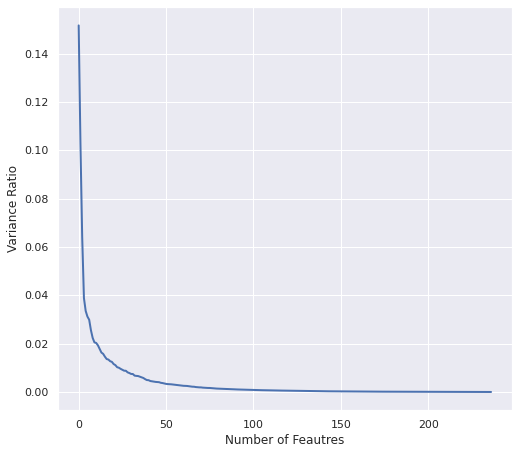

In [176]:
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(PCA.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')

In [178]:
y.dtype

dtype('float64')

In [0]:
reg = SVR(C=100, epsilon=2, kernel='rbf')

In [180]:
reg.fit(x_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_test=reg.predict(x_test)

In [0]:
RMSE_ERROR=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))

In [183]:
RMSE_ERROR

0.3261829975561413

In [0]:
y_pred_train=reg.predict(x_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))

In [185]:
rmse

0.31468976039598623

In [0]:
x_train_pca=PCA.fit_transform(x_train)
x_test_pca=PCA.fit_transform(x_test)

In [187]:
reg.fit(x_train_pca,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_test1=reg.predict(x_test_pca)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
rmse1=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test1))

In [192]:
rmse1

0.3261829975561413

In [0]:
y_pred_train1=reg.predict(x_train_pca)

In [0]:
rmse2=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train1))

In [195]:
rmse2

0.31468976039598623